#### Date Science Blog Assignment -- Happiness Index

Looking at the happiness index from the Kaggle dataset "https://www.kaggle.com/unsdsn/world-happiness"
This dataset is from 2015 - 2019. Countries are ranked by happiness and factors that contribute to a happiness score. For the purpose of the assignment I would like to answer the following:

    1. What factors contribute to happiness scores, and what factor has the highest weighting (Looking at 2019)
    2. What factors contributes if we look at all years
    3. Are their differences between the years and the expected results of the happiness explanatopry variable coefficients


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline



Load in all the files and check data sets

In [3]:
df_2015 = pd.read_csv('./2015.csv')
df_2016 = pd.read_csv('./2016.csv')
df_2017 = pd.read_csv('./2017.csv')
df_2018 = pd.read_csv('./2018.csv')
df_2019 = pd.read_csv('./2019.csv')
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


 Check descriptive stats

In [4]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Check for null values. All data is numerical only country is categorical but it should be excluded from the linear regression model as a country will only have one record per file

In [6]:
df_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

array([[<AxesSubplot:title={'center':'Overall rank'}>,
        <AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'GDP per capita'}>],
       [<AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>],
       [<AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:>]], dtype=object)

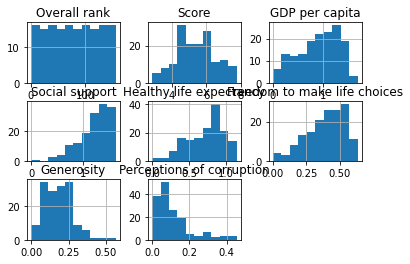

In [7]:
df_2019.hist()


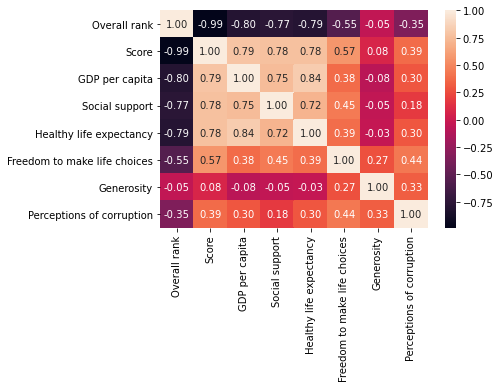

In [9]:
sns.heatmap(df_2019.corr(), annot=True, fmt=".2f");

In [12]:
y = df_2019['Score']
X = df_2019.select_dtypes(include=['float', 'int'])

X

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [69]:
def clean_fit_linear_mod(df, response_col, test_size=.3, rand_state=12):
    

    #Split into explanatory and response variables
    X = df.select_dtypes(include=['float', 'int'])
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2019, 'Score')

In [70]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


In [71]:
def coef_weights(coefficients, X_train):
   
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)


In [72]:
#A quick look at the top results
coef_df.head(20).sort_values('abs_coefs', ascending=False)

,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
5,Generosity,-2.230270e-15,2.230270e-15
2,Social support,-1.839301e-15,1.839301e-15
6,Perceptions of corruption,-1.063334e-15,1.063334e-15
4,Freedom to make life choices,8.006610e-16,8.006610e-16
3,Healthy life expectancy,5.883204e-16,5.883204e-16
1,GDP per capita,3.835572e-16,3.835572e-16
